In [ ]:
# This project is based on Airfoil Self-Noise Dataset from UCI Machine Learning Repository. This is  a regression problem.
# Here Artificial Neural Network with PyTorch is used

In [543]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [544]:
df = pd.read_csv('airfoil_self_noise.csv')

In [545]:
df.head()

,"Frequency, in Hertzs.","Angle of attack, in degrees","Chord length, in meters","Free-stream velocity, in meters per second","Suction side displacement thickness, in meters","Scaled sound pressure level, in decibels"
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [546]:
df.tail()

,"Frequency, in Hertzs.","Angle of attack, in degrees","Chord length, in meters","Free-stream velocity, in meters per second","Suction side displacement thickness, in meters","Scaled sound pressure level, in decibels"
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224
1502,6300,15.6,0.1016,39.6,0.052849,104.204


In [547]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Frequency, in Hertzs.                            1503 non-null   int64  
 1    Angle of attack, in degrees                     1503 non-null   float64
 2   Chord length, in meters                          1503 non-null   float64
 3   Free-stream velocity, in meters per second       1503 non-null   float64
 4    Suction side displacement thickness, in meters  1503 non-null   float64
 5   Scaled sound pressure level, in decibels         1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [548]:
df.describe()

,"Frequency, in Hertzs.","Angle of attack, in degrees","Chord length, in meters","Free-stream velocity, in meters per second","Suction side displacement thickness, in meters","Scaled sound pressure level, in decibels"
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [549]:
df.corr()

,"Frequency, in Hertzs.","Angle of attack, in degrees","Chord length, in meters","Free-stream velocity, in meters per second","Suction side displacement thickness, in meters","Scaled sound pressure level, in decibels"
"Frequency, in Hertzs.",1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
"Angle of attack, in degrees",-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
"Chord length, in meters",-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
"Free-stream velocity, in meters per second",0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
"Suction side displacement thickness, in meters",-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
"Scaled sound pressure level, in decibels",-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


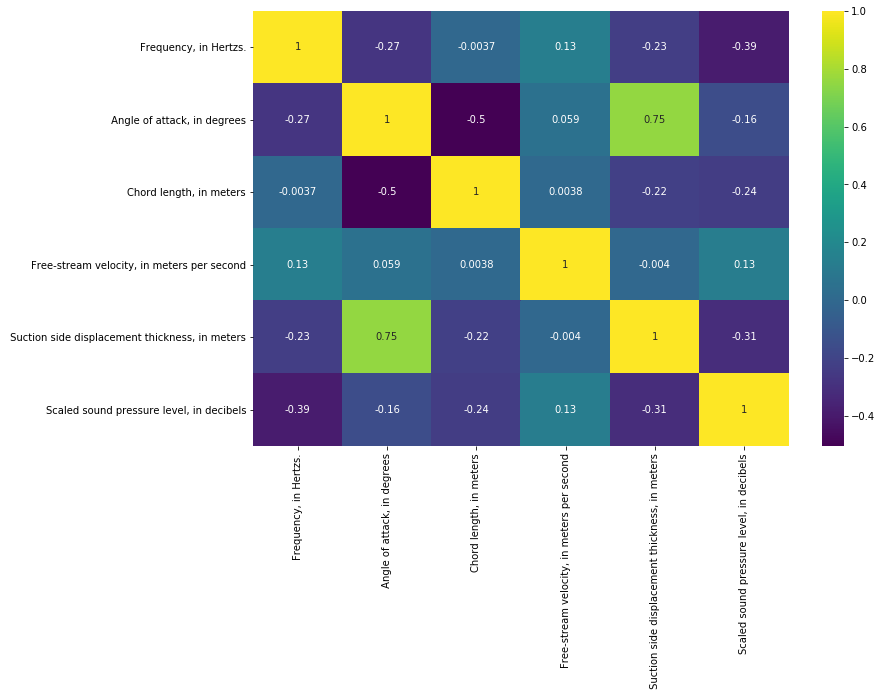

In [551]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

<Figure size 864x720 with 0 Axes>

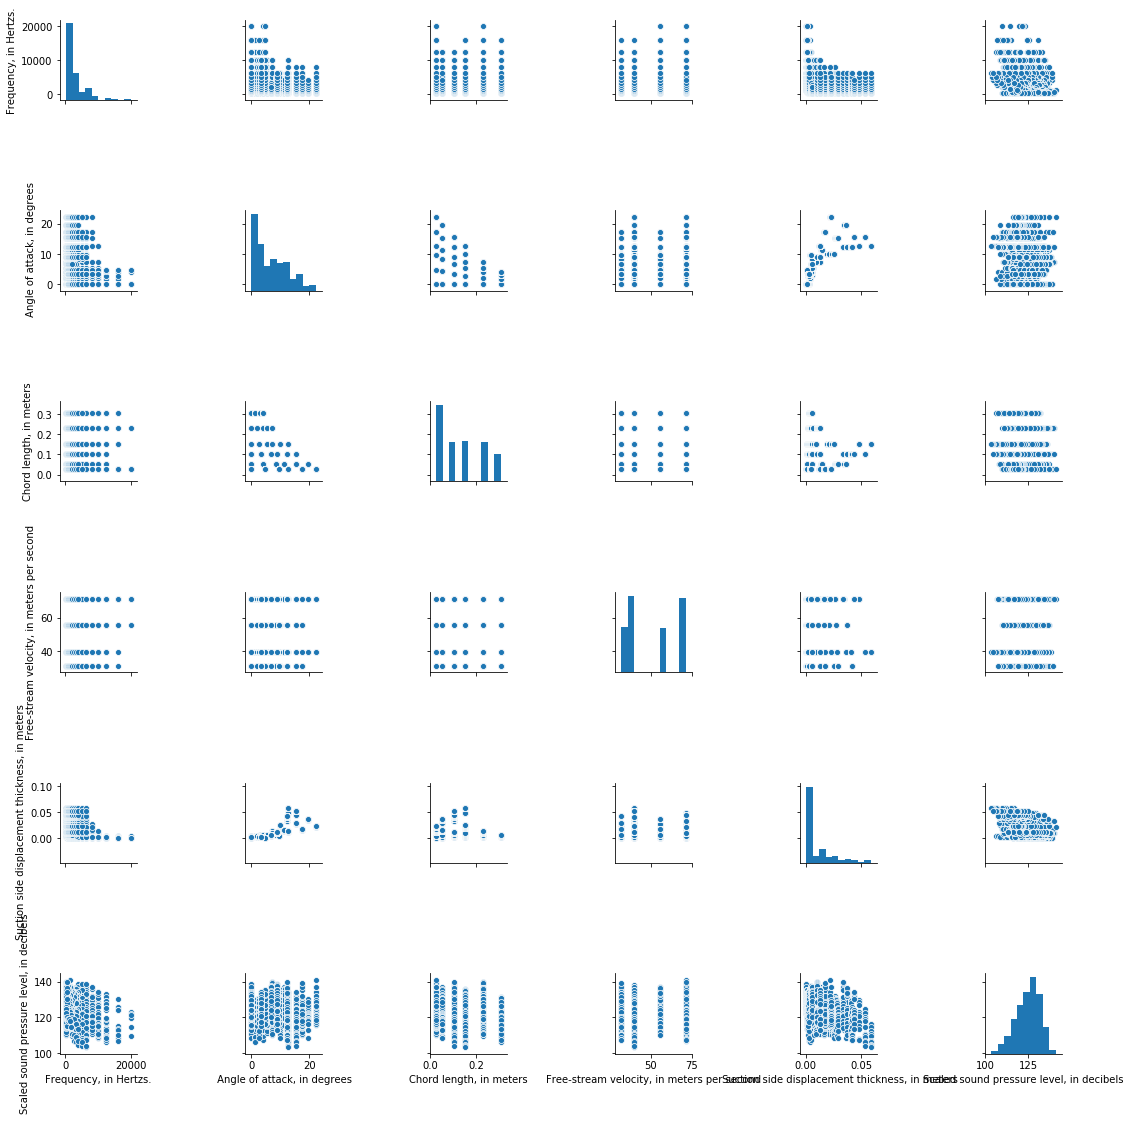

In [552]:
plt.figure(figsize=(12,10))
sns.pairplot(df)

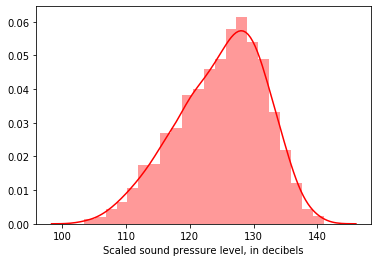

In [553]:
sns.distplot(df['Scaled sound pressure level, in decibels'], color='red')

In [554]:
df.isnull().sum()

Frequency, in Hertzs.                              0
 Angle of attack, in degrees                       0
Chord length, in meters                            0
Free-stream velocity, in meters per second         0
 Suction side displacement thickness, in meters    0
Scaled sound pressure level, in decibels           0
dtype: int64

In [555]:
X = df.drop('Scaled sound pressure level, in decibels', axis=1).values

In [556]:
X

array([[8.00000e+02, 0.00000e+00, 3.04800e-01, 7.13000e+01, 2.66337e-03],
       [1.00000e+03, 0.00000e+00, 3.04800e-01, 7.13000e+01, 2.66337e-03],
       [1.25000e+03, 0.00000e+00, 3.04800e-01, 7.13000e+01, 2.66337e-03],
       ...,
       [4.00000e+03, 1.56000e+01, 1.01600e-01, 3.96000e+01, 5.28487e-02],
       [5.00000e+03, 1.56000e+01, 1.01600e-01, 3.96000e+01, 5.28487e-02],
       [6.30000e+03, 1.56000e+01, 1.01600e-01, 3.96000e+01, 5.28487e-02]])

In [557]:
y = df['Scaled sound pressure level, in decibels'].values

In [558]:
y

array([126.201, 125.201, 125.951, ..., 106.604, 106.224, 104.204])

In [559]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [560]:
X_train

array([[8.00000e+02, 9.50000e+00, 2.54000e-02, 7.13000e+01, 4.20654e-03],
       [3.15000e+02, 7.30000e+00, 2.28600e-01, 5.55000e+01, 1.11706e-02],
       [2.00000e+03, 1.26000e+01, 1.52400e-01, 7.13000e+01, 4.83159e-02],
       ...,
       [1.25000e+03, 2.22000e+01, 2.54000e-02, 7.13000e+01, 2.14178e-02],
       [1.25000e+03, 5.40000e+00, 1.52400e-01, 5.55000e+01, 4.33288e-03],
       [1.00000e+03, 9.90000e+00, 1.52400e-01, 3.17000e+01, 2.52785e-02]])

In [561]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [562]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [563]:
sc1 = StandardScaler()

In [564]:
y_train = y_train.reshape(-1, 1)
y_train = sc1.fit_transform(y_train)

In [565]:
y_train

array([[ 0.34197694],
       [ 1.65652711],
       [-1.06293227],
       ...,
       [ 2.33755041],
       [ 0.85907968],
       [-0.39030773]])

In [566]:
y_test = y_test.reshape(-1, 1)
y_test = sc1.transform(y_test)

In [567]:
y_test

array([[ 8.60527738e-01],
       [-7.67962157e-01],
       [-2.10365403e+00],
       [-1.07857134e+00],
       [ 4.02650711e-01],
       [-4.61117938e-01],
       [-8.91336992e-01],
       [ 7.50330262e-01],
       [-1.46476932e+00],
       [-9.22966894e-02],
       [ 1.43737325e-01],
       [ 9.66381029e-01],
       [ 8.47495185e-01],
       [-1.01876640e+00],
       [ 2.63057588e-01],
       [-1.69428706e+00],
       [ 2.77103784e-01],
       [ 1.23543084e+00],
       [-9.78944709e-01],
       [-1.25957902e+00],
       [-2.00466879e-01],
       [ 7.59018631e-01],
       [ 7.37008097e-01],
       [-6.06358501e-01],
       [ 1.33418863e+00],
       [-3.98996102e-01],
       [-1.12244760e+00],
       [ 2.01477751e+00],
       [ 8.66609596e-01],
       [ 4.91851295e-01],
       [ 5.94808464e-01],
       [-3.35571011e-01],
       [-3.10817425e+00],
       [ 2.26132021e-01],
       [ 1.00721636e+00],
       [ 8.86158425e-01],
       [-8.09666327e-01],
       [-2.20197740e+00],
       [ 4.2

In [568]:
import torch

In [569]:
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable

In [570]:
#-------------Applying Artificial Neural Network to the training dataset using PyTorch-------------

In [571]:
class ANN(nn.Module):
    def __init__(self, input_size, output_size):
        super(ANN, self).__init__()
        self.h1 = nn.Linear(input_size, 8)
        self.h2 = nn.Linear(8, 8)
        self.h3 = nn.Linear(8, 8)
        self.h4 = nn.Linear(8, output_size)
        self.activation = nn.ReLU()
        
    def forward(self, x):
        x = self.activation(self.h1(x))
        x = self.activation(self.h2(x))
        x = self.activation(self.h3(x))
        output = self.h4(x)
        return output

In [572]:
learningRate = 0.01
epochs = 400

In [573]:
regressor = ANN(input_size= 5, output_size= 1)
criterion = nn.MSELoss()
optimizer = optim.Adam(regressor.parameters(), lr=learningRate)

In [574]:
X_train = np.array(X_train, dtype = np.float32)
y_train = np.array(y_train, dtype = np.float32)
X_test = np.array(X_test, dtype = np.float32)

In [575]:
for epoch in range(1, epochs+1):
    inputs = Variable(torch.from_numpy(X_train))
    targets = Variable(torch.from_numpy(y_train))
    optimizer.zero_grad()
    outputs = regressor(inputs)
    loss = criterion(outputs, targets)
    #print(loss)
    loss.backward()
    optimizer.step()
    print('Epoch = ', format(epoch), 'loss = ', format(loss))

Epoch =  1 loss =  1.0399506092071533
Epoch =  2 loss =  1.0159175395965576
Epoch =  3 loss =  0.9930590391159058
Epoch =  4 loss =  0.9733403325080872
Epoch =  5 loss =  0.9556639790534973
Epoch =  6 loss =  0.9382713437080383
Epoch =  7 loss =  0.9200824499130249
Epoch =  8 loss =  0.9005399942398071
Epoch =  9 loss =  0.8784686326980591
Epoch =  10 loss =  0.8538081049919128
Epoch =  11 loss =  0.8266762495040894
Epoch =  12 loss =  0.7977444529533386
Epoch =  13 loss =  0.7674201130867004
Epoch =  14 loss =  0.7360447645187378
Epoch =  15 loss =  0.7046735882759094
Epoch =  16 loss =  0.6751267910003662
Epoch =  17 loss =  0.6495887041091919
Epoch =  18 loss =  0.6286574006080627
Epoch =  19 loss =  0.6124506592750549
Epoch =  20 loss =  0.5996019840240479
Epoch =  21 loss =  0.5884594917297363
Epoch =  22 loss =  0.5777540802955627
Epoch =  23 loss =  0.5666706562042236
Epoch =  24 loss =  0.5545880198478699
Epoch =  25 loss =  0.5403231978416443
Epoch =  26 loss =  0.524295032024

Epoch =  237 loss =  0.07591300457715988
Epoch =  238 loss =  0.07592104375362396
Epoch =  239 loss =  0.07587040960788727
Epoch =  240 loss =  0.07572193443775177
Epoch =  241 loss =  0.07534419745206833
Epoch =  242 loss =  0.07504228502511978
Epoch =  243 loss =  0.07499288767576218
Epoch =  244 loss =  0.07500718533992767
Epoch =  245 loss =  0.07488715648651123
Epoch =  246 loss =  0.07474803924560547
Epoch =  247 loss =  0.07467525452375412
Epoch =  248 loss =  0.07466679811477661
Epoch =  249 loss =  0.0747460126876831
Epoch =  250 loss =  0.07469826936721802
Epoch =  251 loss =  0.07467649132013321
Epoch =  252 loss =  0.07464389503002167
Epoch =  253 loss =  0.07437567412853241
Epoch =  254 loss =  0.07421007007360458
Epoch =  255 loss =  0.07407252490520477
Epoch =  256 loss =  0.07403258979320526
Epoch =  257 loss =  0.07401200383901596
Epoch =  258 loss =  0.07410654425621033
Epoch =  259 loss =  0.07414590567350388
Epoch =  260 loss =  0.07408720254898071
Epoch =  261 loss

In [576]:
y_pred = regressor(Variable(torch.from_numpy(X_test))).data.numpy()

In [327]:
y_pred

array([[ 0.98922956],
       [-1.0924066 ],
       [-2.0830903 ],
       [ 0.30054328],
       [-0.3525399 ],
       [ 0.5840194 ],
       [-0.9379462 ],
       [ 0.9064326 ],
       [-1.7709491 ],
       [-0.08947989],
       [ 0.25158644],
       [ 0.865003  ],
       [ 0.9155631 ],
       [-0.9858216 ],
       [ 0.476082  ],
       [-1.6833919 ],
       [ 0.6995466 ],
       [ 0.57314694],
       [-0.6746212 ],
       [ 0.18004915],
       [-0.80263805],
       [ 0.65821755],
       [ 0.7684164 ],
       [ 0.29971144],
       [ 0.6699159 ],
       [-0.3619436 ],
       [-0.9848404 ],
       [ 0.55290866],
       [ 0.6384394 ],
       [ 0.49054632],
       [ 0.41174033],
       [-0.29354444],
       [-2.994771  ],
       [ 0.46069518],
       [ 0.7037147 ],
       [ 0.34627727],
       [-0.77051556],
       [-2.1537602 ],
       [ 0.29567775],
       [ 0.20951709],
       [ 1.0639285 ],
       [ 0.05182025],
       [ 0.2974389 ],
       [-0.80601144],
       [-2.0755615 ],
       [ 1

In [577]:
# calculate root mean squared error of the test set
import math
testScore = math.sqrt(np.mean((y_test - y_pred)**2))
print('RMSE of test set:', testScore)



RMSE of test set: 0.27997715045769067


In [578]:
y_pred_train = regressor(Variable(torch.from_numpy(X_train))).data.numpy()

In [579]:
trainScore = math.sqrt(np.mean((y_train - y_pred_train)**2))
print('RMSE of training set:', trainScore)

RMSE of training set: 0.2614866052719937


In [580]:
y_test = sc1.inverse_transform(y_test)

In [581]:
y_pred = sc1.inverse_transform(y_pred)

In [582]:
X_test = sc.inverse_transform(X_test)

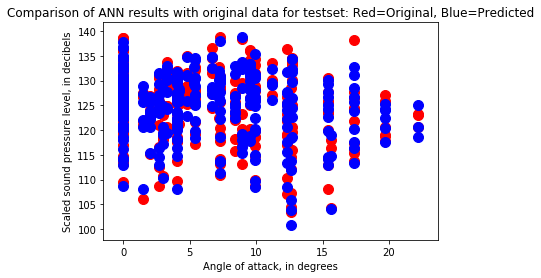

In [583]:
plt.scatter(X_test[:,1], y_test, c='red', s=100)
plt.scatter(X_test[:,1], y_pred, c='blue', s=100)
plt.xlabel('Angle of attack, in degrees')
plt.ylabel('Scaled sound pressure level, in decibels')
plt.title('Comparison of ANN results with original data for testset: Red=Original, Blue=Predicted')
plt.show()

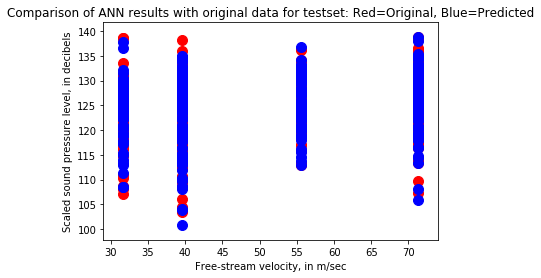

In [584]:
plt.scatter(X_test[:,3], y_test, c='red', s=100)
plt.scatter(X_test[:,3], y_pred, c='blue', s=100)
plt.xlabel('Free-stream velocity, in m/sec')
plt.ylabel('Scaled sound pressure level, in decibels')
plt.title('Comparison of ANN results with original data for testset: Red=Original, Blue=Predicted')
plt.show()

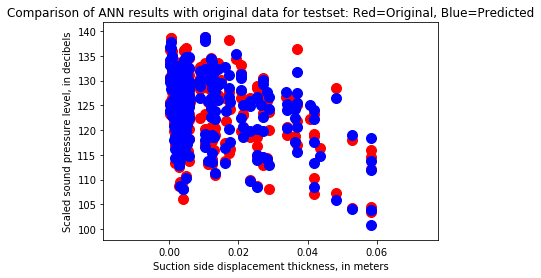

In [586]:
plt.scatter(X_test[:,4], y_test, c='red', s=100)
plt.scatter(X_test[:,4], y_pred, c='blue', s=100)
plt.xlabel('Suction side displacement thickness, in meters')
plt.ylabel('Scaled sound pressure level, in decibels')
plt.title('Comparison of ANN results with original data for testset: Red=Original, Blue=Predicted')
plt.show()

In [595]:
torch.save(regressor, 'Airfoil-Self-Noise-Dataset.pth')

C:\Sandip\anaconda3\lib\site-packages\torch\serialization.py:360: UserWarning: Couldn't retrieve source code for container of type ANN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [599]:
model = torch.load('Airfoil-Self-Noise-Dataset.pth')

In [604]:
model.eval()

ANN(
  (h1): Linear(in_features=5, out_features=8, bias=True)
  (h2): Linear(in_features=8, out_features=8, bias=True)
  (h3): Linear(in_features=8, out_features=8, bias=True)
  (h4): Linear(in_features=8, out_features=1, bias=True)
  (activation): ReLU()
)